In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 999

# Overall market

In [2]:
# Numbers in equities data are in millions
equities_in_millions = 1000000

In [3]:
# Read data from csv files
df_equities = pd.read_csv('marketable_securities.csv')
df_equities.head()

,Staða í m.kr. / Position in ISK mill.,6/30/2020,5/31/2020,4/30/2020,3/31/2020,2/29/2020,1/31/2020,12/31/2019,11/30/2019,10/31/2019,...,10/31/1987,9/30/1987,8/31/1987,7/31/1987,6/30/1987,5/31/1987,4/30/1987,3/31/1987,2/28/1987,1/31/1987
0,Markaðsskuldabréf / Marketable bonds*,2651186.0,2595673.0,2571476.0,2534050.0,2522800.0,2536771.0,2512159.0,2513221.0,2512447.0,...,16215.0,15970.0,14999.0,14780.0,14499.0,13488.0,13170.0,13025.0,11517.0,11657.0
1,Ríkisbréf / Treasury bonds,708346.0,707073.0,694187.0,662533.0,654983.0,691801.0,687941.0,684683.0,694523.0,...,11366.0,11221.0,11159.0,10940.0,10659.0,10459.0,10141.0,9996.0,9923.0,10063.0
2,Óverðtryggð ríkisbréf / Nominal Treasury bonds,477117.0,475879.0,465572.0,439208.0,429141.0,471906.0,470446.0,465471.0,471797.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Verðtryggð ríkisbréf / Inflation-linked Treasu...,231229.0,231194.0,228615.0,223325.0,225842.0,219895.0,217495.0,219212.0,222726.0,...,11366.0,11221.0,11159.0,10940.0,10659.0,10459.0,10141.0,9996.0,9923.0,10063.0
4,Gengisbundin ríkisbréf/ Currency-linked Treasu...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
filter = df_equities['Staða í m.kr. / Position in ISK mill.'] == 'Aðallisti / ICEX Main list'
df_equities = df_equities[filter]

In [5]:
df_equities = df_equities.T
df_equities.head()

,18
Staða í m.kr. / Position in ISK mill.,Aðallisti / ICEX Main list
6/30/2020,1.18907e+06
5/31/2020,1.16406e+06
4/30/2020,1.09124e+06
3/31/2020,1.0381e+06


In [6]:
df_equities = df_equities.iloc[1:,:]

In [7]:
df_equities.rename(columns={18: 'Market_cap_equities'}, inplace=True)

In [8]:
df_equities = df_equities.dropna()

In [9]:
df_equities.index = pd.to_datetime(df_equities.index)

In [10]:
df_equities.head()

,Market_cap_equities
2020-06-30,1.18907e+06
2020-05-31,1.16406e+06
2020-04-30,1.09124e+06
2020-03-31,1.0381e+06
2020-02-29,1.11909e+06


In [11]:
# Move index to column
df_equities = df_equities.reset_index()

In [12]:
# Rename 'index' column
df_equities.rename(columns={'index': 'Date'}, inplace=True)

In [13]:
# Correct numbers which are in millions
df_equities['Market_cap_equities'] = df_equities['Market_cap_equities']*equities_in_millions 

In [14]:
df_equities.head()

,Date,Market_cap_equities
0,2020-06-30,1.18907e+12
1,2020-05-31,1.16406e+12
2,2020-04-30,1.09124e+12
3,2020-03-31,1.0381e+12
4,2020-02-29,1.11909e+12


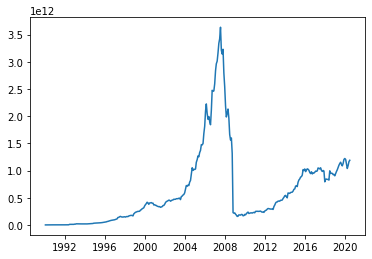

In [15]:
plt.plot(df_equities['Date'], df_equities['Market_cap_equities'])
plt.show()

# Marel

In [16]:
number_of_shares = 771007916

In [17]:
df_marel = pd.read_csv('marel_share_price.csv')
df_marel.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
0,8/12/2020,"704,00","709,00","709,00","709,00","700,00","705,00",704582.00,292156.0,205847710.00,8.0
1,8/11/2020,"705,00","709,00","710,00","716,00","707,00","707,00",711625.00,361022.0,256912120.00,15.0
2,8/10/2020,"701,00","706,00","701,00","706,00","701,00","701,00",701991.00,30616.0,21492166.00,4.0
3,8/7/2020,"700,00","706,00","702,00","715,00","702,00","704,00",708358.00,338850.0,239940000.00,17.0
4,8/6/2020,"705,00","711,00","706,00","708,00","704,00","706,00",706177.00,3226.0,2278128.00,8.0


In [18]:
# Delete unnecessary columns
df_marel = df_marel.iloc[:,[0,6]]

In [19]:
# Change closing price ',' to '.'
df_marel['Closing price'] = df_marel['Closing price'].str.replace(',', '.')

# Change data type
df_marel['Closing price'] = df_marel['Closing price'].astype('float')
df_marel['Date'] = pd.to_datetime(df_marel['Date'])

In [20]:
# Add market cap column
df_marel['Market cap Marel'] = df_marel['Closing price'] * number_of_shares

In [21]:
df_marel = df_marel.sort_values(by = 'Date')

In [22]:
df_marel.head()

,Date,Closing price,Market cap Marel
3156,2007-12-03,95.0,7.324575e+10
3155,2007-12-04,95.6,7.370836e+10
3154,2007-12-05,96.4,7.432516e+10
3153,2007-12-06,97.8,7.540457e+10
3152,2007-12-07,98.9,7.625268e+10


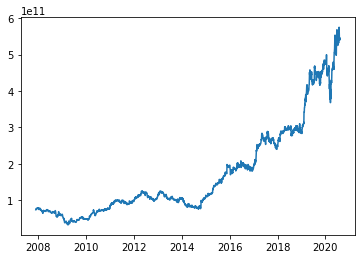

In [23]:
plt.plot(df_marel['Date'], df_marel['Market cap Marel'])
plt.show()

# Merge dataframes

In [24]:
df_equities_comps = df_equities.merge(df_marel, on=['Date'], how='inner')

In [25]:
df_equities_comps.head()

,Date,Market_cap_equities,Closing price,Market cap Marel
0,2020-06-30,1.18907e+12,705.0,5.435606e+11
1,2020-04-30,1.09124e+12,621.0,4.787959e+11
2,2020-03-31,1.0381e+12,558.0,4.302224e+11
3,2020-01-31,1.20462e+12,583.0,4.494976e+11
4,2019-10-31,1.13056e+12,576.0,4.441006e+11


In [26]:
df_equities_comps['Comp %'] = df_equities_comps['Market cap Marel']/df_equities_comps['Market_cap_equities']

In [27]:
df_equities_comps.head()

,Date,Market_cap_equities,Closing price,Market cap Marel,Comp %
0,2020-06-30,1.18907e+12,705.0,5.435606e+11,0.457131
1,2020-04-30,1.09124e+12,621.0,4.787959e+11,0.438762
2,2020-03-31,1.0381e+12,558.0,4.302224e+11,0.414431
3,2020-01-31,1.20462e+12,583.0,4.494976e+11,0.373143
4,2019-10-31,1.13056e+12,576.0,4.441006e+11,0.392813


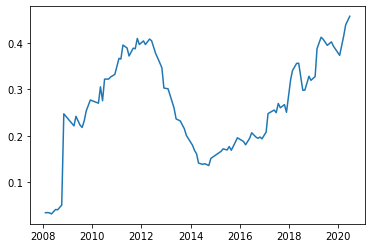

In [28]:
plt.plot(df_equities_comps['Date'], df_equities_comps['Comp %'])
plt.show()

# Össur

In [29]:
number_of_shares_ossur = 423_000_000

In [30]:
# Share price info is in DKK
df_ossur = pd.read_csv('ossur_share_price.csv')
df_ossur.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
0,8/12/2020,"44,40","44,55","44,40","44,75","44,30","44,50",44426.00,22808.0,"1013259,9",76.0
1,8/11/2020,"44,60","44,65","44,30","44,75","44,25","44,50",44522.00,16213.0,"721754,12",111.0
2,8/10/2020,"44,50","44,60","44,50","44,70","44,05","44,50",44593.00,320444.0,"14289677,7",89.0
3,8/7/2020,"44,50","44,60","44,00","44,55","44,00","44,50",44484.00,27506.0,"1223583,2",178.0
4,8/6/2020,"44,05","44,35","44,35","44,65","44,05","44,35","44,33",9752.0,"432264,83",93.0


In [31]:
# Delete unnecessary columns
df_ossur = df_ossur.iloc[:,[0,6]]

In [32]:
# Change closing price ',' to '.'
df_ossur['Closing price'] = df_ossur['Closing price'].str.replace(',', '.')

# Change data type
df_ossur['Closing price'] = df_ossur['Closing price'].astype('float')
df_ossur['Date'] = pd.to_datetime(df_ossur['Date'])

In [33]:
# Add market cap column
df_ossur['Market cap Ossur DKK'] = df_ossur['Closing price'] * number_of_shares_ossur

In [34]:
df_ossur = df_ossur.sort_values(by = 'Date')

In [35]:
df_ossur

,Date,Closing price,Market cap Ossur DKK
2400,2011-01-03,9.40,3.976200e+09
2399,2011-01-04,9.50,4.018500e+09
2398,2011-01-05,9.55,4.039650e+09
2397,2011-01-06,9.40,3.976200e+09
2396,2011-01-07,9.55,4.039650e+09
...,...,...,...
4,2020-08-06,44.35,1.876005e+10
3,2020-08-07,44.50,1.882350e+10
2,2020-08-10,44.50,1.882350e+10
1,2020-08-11,44.50,1.882350e+10


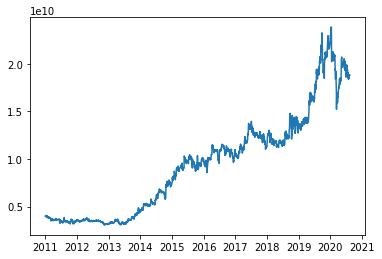

In [36]:
plt.plot(df_ossur['Date'], df_ossur['Market cap Ossur DKK'])
plt.show()

#### Danish kronur exchange rate

In [37]:
# Get isk dkk exchange rate
# Exchange rate is in thousands in csv file
df_isk_dk = pd.read_csv('gengi_dkk_isk.csv')
df_isk_dk.head()

,DAGS,MED
0,13.8.2010,20595.0
1,16.8.2010,20576.0
2,17.8.2010,20605.0
3,18.8.2010,20609.0
4,19.8.2010,20598.0


In [38]:
df_isk_dk['DAGS'] = pd.to_datetime(df_isk_dk['DAGS'])

In [39]:
df_isk_dk.rename(columns={'DAGS': 'Date', 'MED':'Exchange Rate'}, inplace=True)

In [40]:
df_isk_dk['Exchange Rate'] = df_isk_dk['Exchange Rate']/1000

In [41]:
df_isk_dk

,Date,Exchange Rate
0,2010-08-13,20.595
1,2010-08-16,20.576
2,2010-08-17,20.605
3,2010-08-18,20.609
4,2010-08-19,20.598
...,...,...
2492,2020-07-08,21.531
2493,2020-10-08,21.564
2494,2020-11-08,21.629
2495,2020-12-08,21.630


In [42]:
df_ossur = df_ossur.merge(df_isk_dk, on=['Date'], how='inner')

In [43]:
df_ossur

,Date,Closing price,Market cap Ossur DKK,Exchange Rate
0,2011-01-03,9.40,3.976200e+09,21.502
1,2011-01-04,9.50,4.018500e+09,21.731
2,2011-01-06,9.40,3.976200e+09,22.144
3,2011-01-07,9.55,4.039650e+09,22.226
4,2011-01-11,9.30,3.933900e+09,21.272
...,...,...,...,...
2083,2020-07-31,44.10,1.865430e+10,21.468
2084,2020-08-04,44.50,1.882350e+10,20.861
2085,2020-08-05,44.35,1.876005e+10,21.246
2086,2020-08-06,44.35,1.876005e+10,20.023


In [44]:
# Add column with ISK market cap
df_ossur['Market cap Ossur'] = (df_ossur['Market cap Ossur DKK'] *
                          df_ossur['Exchange Rate'])

In [45]:
# Delete unnecessary columns
df_ossur = df_ossur.iloc[:,[0,4]]

In [46]:
df_ossur.tail()

,Date,Market cap Ossur
2083,2020-07-31,4.004705e+11
2084,2020-08-04,3.926770e+11
2085,2020-08-05,3.985760e+11
2086,2020-08-06,3.756325e+11
2087,2020-08-07,3.971947e+11


# Merge Ossur data

In [47]:
# Merge dataframe with total market info
# and Marel info with Ossur dataframe.
df_equities_comps = df_equities_comps.merge(df_ossur, on=['Date'], how='inner')

In [48]:
df_equities_comps

,Date,Market_cap_equities,Closing price,Market cap Marel,Comp %,Market cap Ossur
0,2020-06-30,1.18907e+12,705.0,5.435606e+11,0.457131,3.880974e+11
1,2020-04-30,1.09124e+12,621.0,4.787959e+11,0.438762,3.943530e+11
2,2020-03-31,1.0381e+12,558.0,4.302224e+11,0.414431,3.532048e+11
3,2020-01-31,1.20462e+12,583.0,4.494976e+11,0.373143,3.790209e+11
4,2019-10-31,1.13056e+12,576.0,4.441006e+11,0.392813,3.792700e+11
5,2019-09-30,1.08631e+12,566.5,4.367760e+11,0.402073,3.980396e+11
6,2019-07-31,1.15263e+12,590.0,4.548947e+11,0.394658,3.414458e+11
7,2019-04-30,1.0543e+12,563.5,4.344630e+11,0.412089,2.878678e+11
8,2019-02-28,9.80143e+11,492.5,3.797214e+11,0.387414,2.584841e+11
9,2019-01-31,9.41574e+11,400.0,3.084032e+11,0.32754,2.502921e+11


# Adjust for Össur leaving Icelandic stock market

In [49]:
for idx, date in enumerate(df_equities_comps['Date']):
#     print(idx, date)
    if date > np.datetime64('2017-12-14'):
        df_equities_comps.loc[idx,'Market_cap_equities'] = (df_equities_comps.loc[idx,'Market_cap_equities']+
                                                    df_equities_comps.loc[idx, 'Market cap Ossur'])

In [50]:
df_equities_comps.head()

,Date,Market_cap_equities,Closing price,Market cap Marel,Comp %,Market cap Ossur
0,2020-06-30,1.57717e+12,705.0,5.435606e+11,0.457131,3.880974e+11
1,2020-04-30,1.4856e+12,621.0,4.787959e+11,0.438762,3.943530e+11
2,2020-03-31,1.39131e+12,558.0,4.302224e+11,0.414431,3.532048e+11
3,2020-01-31,1.58365e+12,583.0,4.494976e+11,0.373143,3.790209e+11
4,2019-10-31,1.50984e+12,576.0,4.441006e+11,0.392813,3.792700e+11


In [51]:
# Calculate new ratio of market cap to total
df_equities_comps['Comp %'] = ((df_equities_comps['Market cap Marel']+
                               df_equities_comps['Market cap Ossur'])/
                              df_equities_comps['Market_cap_equities'])

In [52]:
# Delete unnecessary columns
df_equities_comps = df_equities_comps.iloc[:,[0,1,3,4,5]]

In [53]:
df_equities_comps.head()

,Date,Market_cap_equities,Market cap Marel,Comp %,Market cap Ossur
0,2020-06-30,1.57717e+12,5.435606e+11,0.590716,3.880974e+11
1,2020-04-30,1.4856e+12,4.787959e+11,0.587743,3.943530e+11
2,2020-03-31,1.39131e+12,4.302224e+11,0.563087,3.532048e+11
3,2020-01-31,1.58365e+12,4.494976e+11,0.523172,3.790209e+11
4,2019-10-31,1.50984e+12,4.441006e+11,0.545338,3.792700e+11


In [54]:
df_equities_comps.to_excel('df_equities.xlsx')